In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
class Body(object):
    def __init__(self, m, x0, v0):
        self.m = m
        self.x = x0
        self.v = v0
        self.a = np.array([0., 0.])
    
    def calculate_a(self, bodys):
        f = np.array([0., 0.])
        for body in bodys:
            f += self.calculate_force(body)
        a = f / self.m
        return a
            
    def calculate_force(self, body):
        m = body.m
        x = body.x
        r = np.linalg.norm(x - self.x)
        f_val = (self.m * m) / (r ** 2.0)
        f = f_val * (x - self.x) / r
        return f
            
    def update(self, bodys, dt):
        self.a = self.calculate_a(bodys)
        self.x = self.x + self.v * dt + self.a * dt * dt / 2
        self.v = self.v + self.a * dt
        return self

In [3]:
class Simulation(object):
    def __init__(self, bodys):
        self.bodys = bodys
        self.trajectories = []
        for body in self.bodys:
            self.trajectories.append([body.x])
            
    def simulate(self, dt=0.001, rounds=10000):
        for i in range(rounds):
            for j, body in enumerate(self.bodys):
                rest = [self.bodys[k] for k in range(len(self.bodys)) if j != k]
                body = body.update(rest,dt)
                self.trajectories[j].append(body.x)
                
    def plot(self):
        plt.figure(figsize=(6,6))
        for trajectory in self.trajectories:
            x, y = zip(*trajectory)
            plt.plot(x, y, alpha=0.5)
            plt.scatter(x[-1], y[-1])
        plt.axis('scaled')
        plt.show()
        
    def simulate_plot(self):
        self.simulate()
        self.plot()

# Two-body system

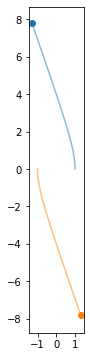

In [4]:
body1 = Body(1., np.array([1., 0.]), np.array([0., 1.]))
body2 = Body(1., np.array([-1., 0.]), np.array([0., -1.]))
two_body = Simulation([body1, body2])
two_body.simulate_plot()

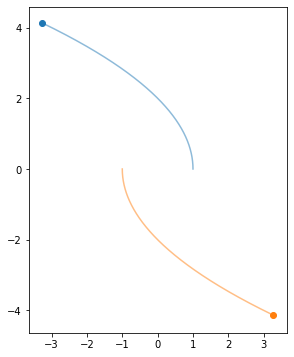

In [5]:
body1 = Body(2., np.array([1., 0.]), np.array([0., 1.]))
body2 = Body(2., np.array([-1., 0.]), np.array([0., -1.]))
two_body = Simulation([body1, body2])
two_body.simulate_plot()

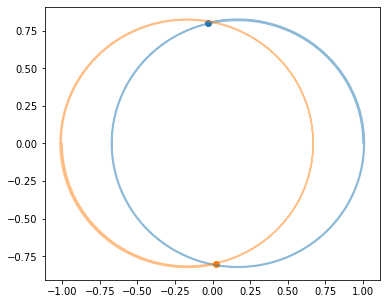

In [6]:
body1 = Body(5., np.array([1., 0.]), np.array([0., 1.]))
body2 = Body(5., np.array([-1., 0.]), np.array([0., -1.]))
two_body = Simulation([body1, body2])
two_body.simulate_plot()

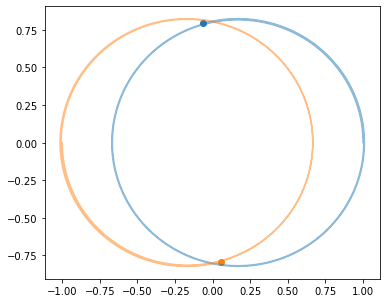

In [7]:
body1 = Body(5.01, np.array([1., 0.]), np.array([0., 1.]))
body2 = Body(5.01, np.array([-1., 0.]), np.array([0., -1.]))
two_body = Simulation([body1, body2])
two_body.simulate_plot()

# Three-body System

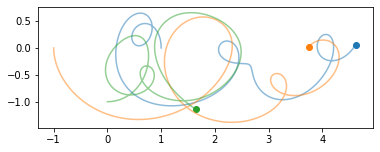

In [8]:
body1 = Body(2., np.array([1., 0.]), np.array([0., 1.]))
body2 = Body(2., np.array([-1., 0.]), np.array([0., -1.]))
body3 = Body(2., np.array([0., -1.]), np.array([1., 0.]))
three_body = Simulation([body1, body2, body3])
three_body.simulate_plot()

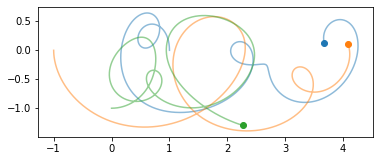

In [9]:
body1 = Body(2.01, np.array([1., 0.]), np.array([0., 1.]))
body2 = Body(2.01, np.array([-1., 0.]), np.array([0., -1.]))
body3 = Body(2.01, np.array([0., -1.]), np.array([1., 0.]))
three_body = Simulation([body1, body2, body3])
three_body.simulate_plot()